In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt
import geone as gn



In [4]:
tiA=gn.img.readImageGslib('D:\轨道资料/6号线勘察报告/TI_spt.txt')
tiB=gn.img.readImageGslib('D:\轨道资料/6号线勘察报告/TI_cpt.txt')


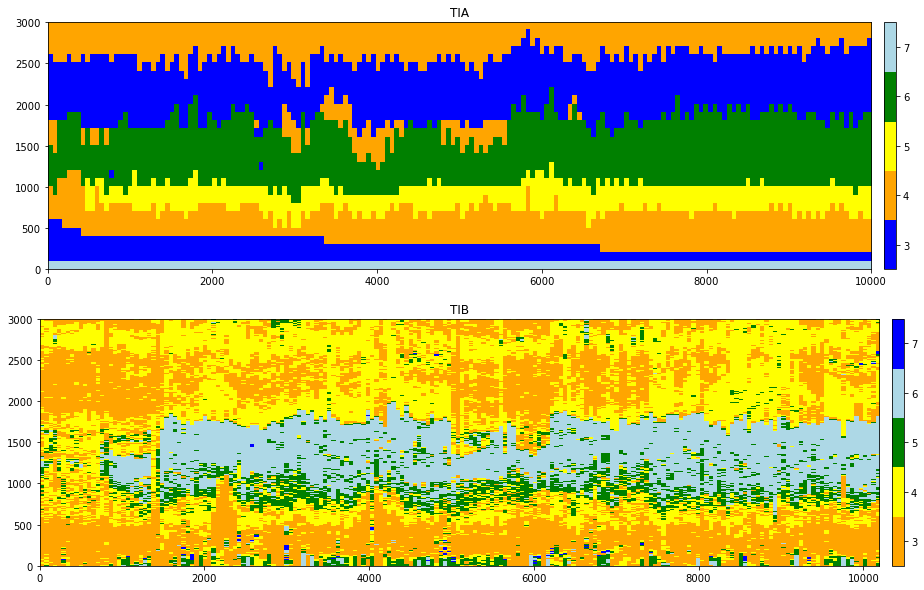

In [5]:
col1=['blue','orange','yellow','green','lightblue']
col2=['orange','yellow','green','lightblue','blue']
plt.subplots(2,1,figsize=(20,10))
plt.subplot(2,1,1)
gn.imgplot.drawImage2D(tiA,categ=True,categCol=col1,title='TIA')
plt.subplot(2,1,2)
gn.imgplot.drawImage2D(tiB,categ=True,categCol=col2,title='TIB')

plt.show()

In [12]:
#simulatiom grid
nx,ny,nz=100,30,1
sx,sy,sz=10,10,1.0
ox,oy,oz=0.0,0.0,0.0

In [13]:
xg=ox+0.5*sx+sx*np.arange(nx)
yg=oy+0.5*sy+sy*np.arange(ny)
xx,yy=np.meshgrid(xg,yg)
nTI=2
# print(np.maximum(xx,190))
pB=(np.minimum(np.maximum(xx,590),990) -590)/800
# pB=xx/1000
pA=1.0-pB
pdf_ti=np.zeros((nTI,nz,ny,nx))
pdf_ti[0,0,:,:]=pA
pdf_ti[1,0,:,:]=pB

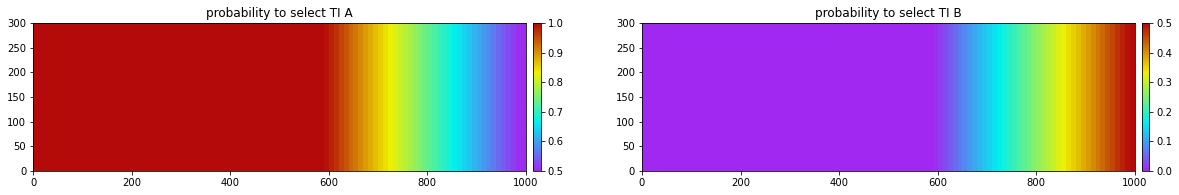

In [14]:
im=gn.img.Img(nx,ny,nz,sx,sy,sz,ox,oy,oz,nv=2,val=pdf_ti)

plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
gn.imgplot.drawImage2D(im, iv=0, title='probability to select TI A')
plt.subplot(1,2,2)
gn.imgplot.drawImage2D(im, iv=1, title='probability to select TI B')
plt.show()

In [19]:
npt=24
nv=4
varname=['x','y','z','code']
v=np.array([
    [200.5, 5.5, 0.5, 7],
    [200.5, 50.5, 0.5, 4],
    [200.5, 100.5, 0.5, 5],
    [200.5, 150.5, 0.5, 6],
    [200.5, 240.5, 0.5, 3],
    [200.5, 290.5, 0.5, 4],
    [400.5, 5.5, 0.5, 7],
    [400.5, 50.5, 0.5, 4],
    [400.5, 100.5, 0.5, 5],
    [400.5, 150.5, 0.5, 6],
    [400.5, 240.5, 0.5, 3],
    [400.5, 290.5, 0.5, 4],
    [600.5, 5.5, 0.5, 7],
    [600.5, 50.5, 0.5, 4],
    [600.5, 100.5, 0.5, 5],
    [600.5, 150.5, 0.5,6],
    [600.5, 240.5, 0.5, 3],
    [600.5, 290.5, 0.5, 4],
    [800.5, 5.5, 0.5, 7],
    [800.5, 50.5, 0.5, 4],
    [800.5, 100.5, 0.5, 5],
    [800.5, 150.5, 0.5, 6],
    [800.5, 240.5, 0.5, 3],
    [800.5, 290.5, 0.5, 4],
]).T

hd=gn.img.PointSet(npt=npt,nv=nv,varname=varname,val=v)
hd_col=[col1[int(v)-3] for v in hd.val[3]]
deesse_input=gn.deesseinterface.DeesseInput(
    nx=nx,ny=ny,nz=nz,
    sx=sx,sy=sy,sz=sz,
    ox=ox,oy=oy,oz=oz,
    nv=1, varname='code',
    nTI=2, TI=[tiA,tiB],
    pdfTI=pdf_ti,
    dataPointSet=hd,
    distanceType='categorical',
    nneighboringNode=24,
    distanceThreshold=0.05,
    maxScanFraction=[0.25,0.3],
    npostProcessingPathMax=1,
    seed=444,
    nrealization=100
)

deesse_output=gn.deesseinterface.deesseRun(deesse_input)

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20211028 / OpenMP 15 thread(s)]
DeeSse run complete


<ipython-input-20-180595b99c7b>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(11,7))


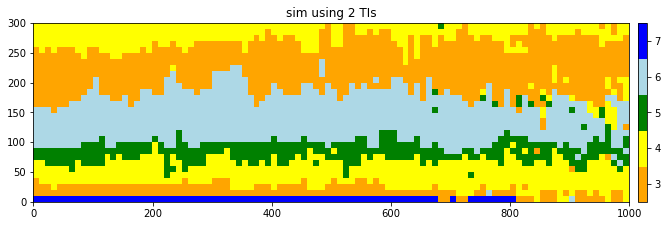

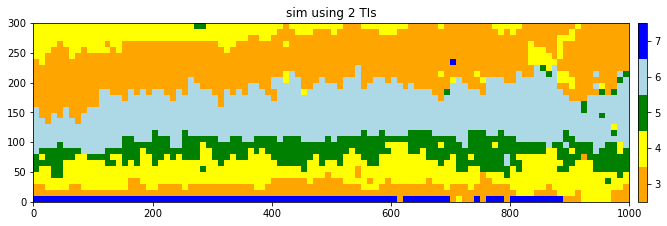

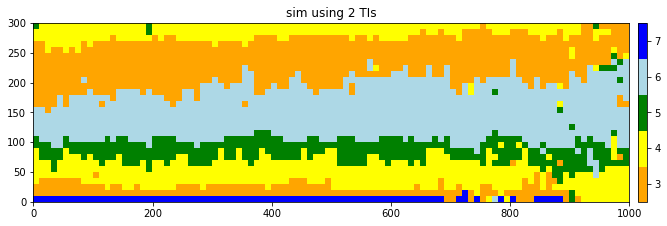

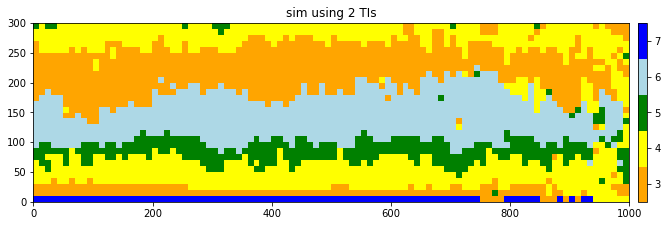

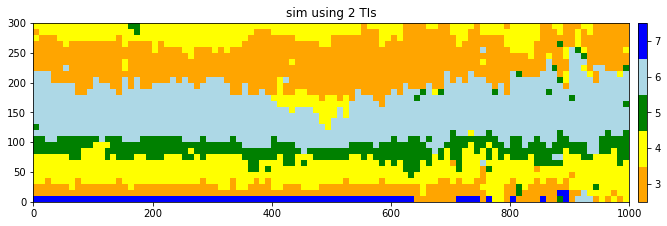

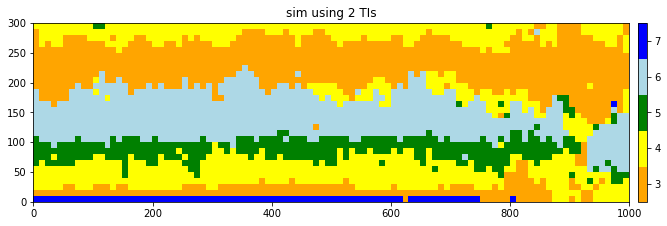

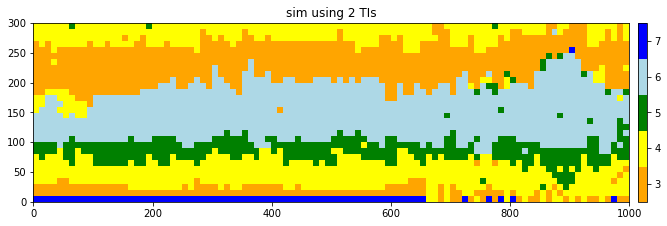

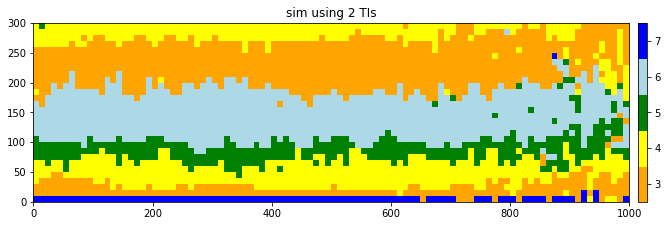

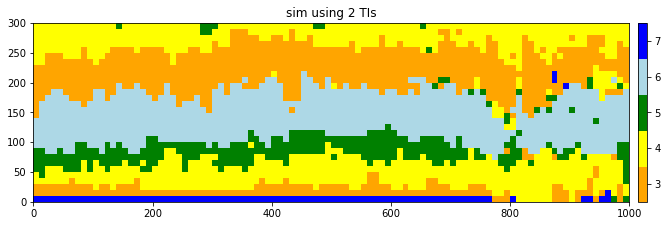

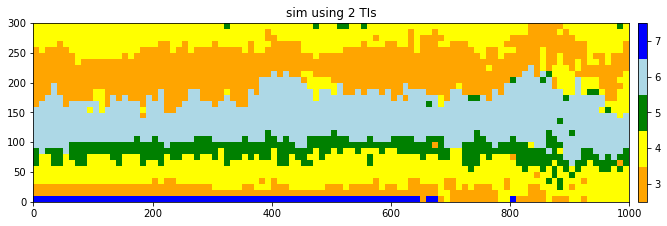

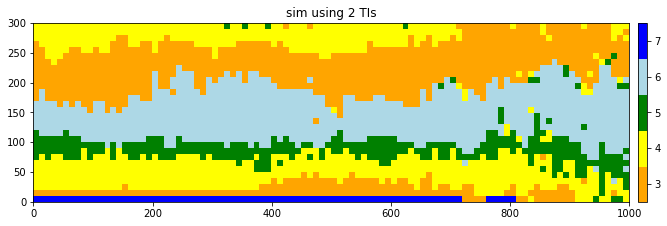

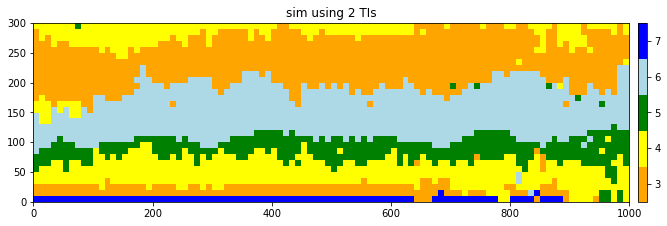

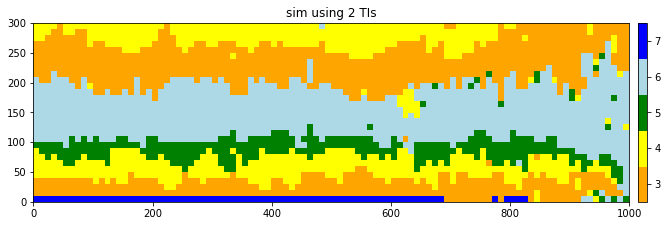

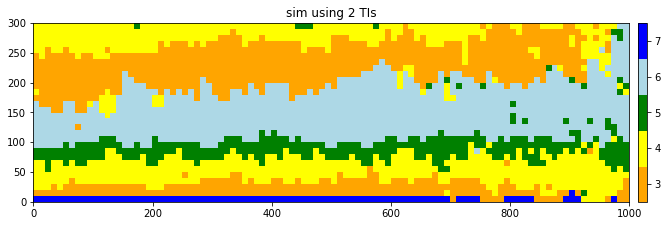

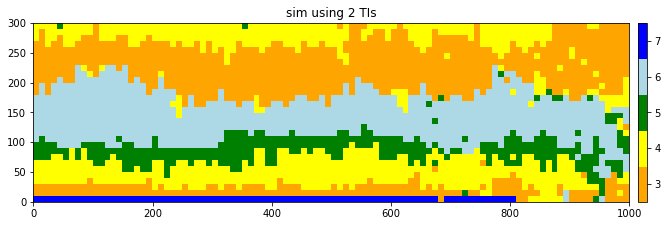

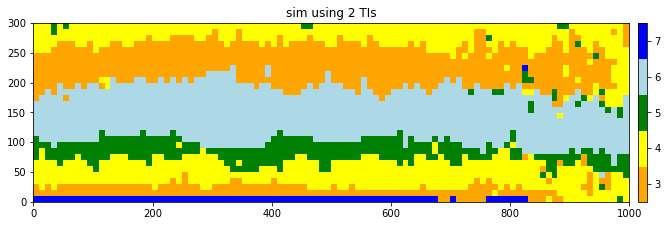

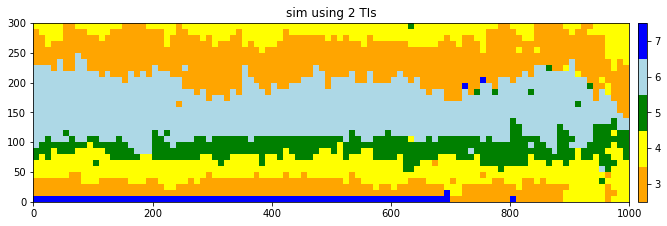

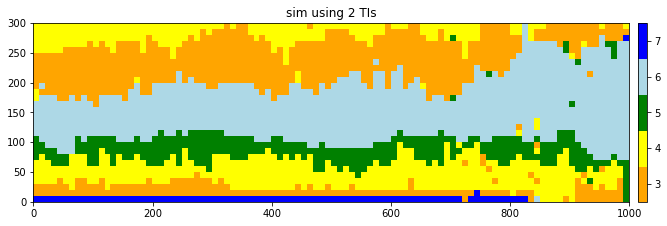

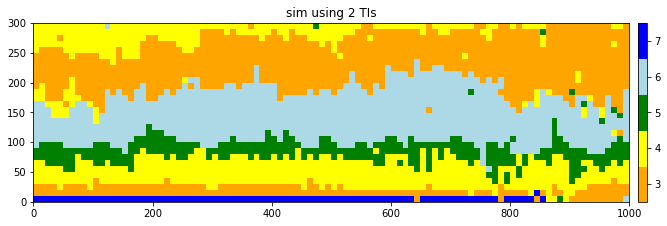

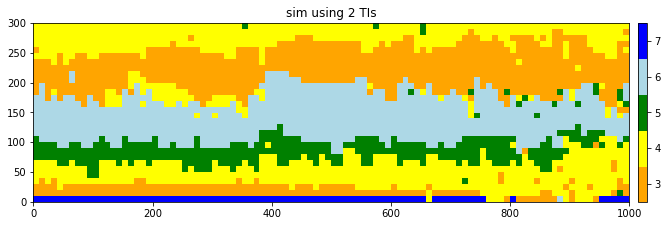

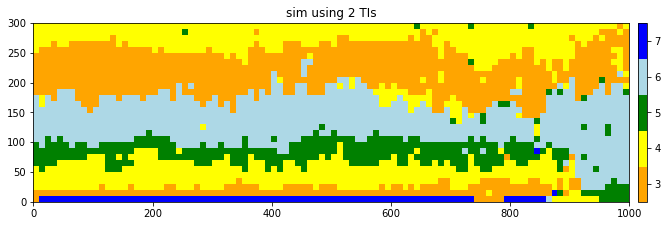

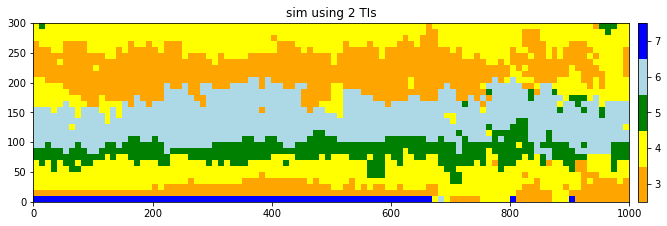

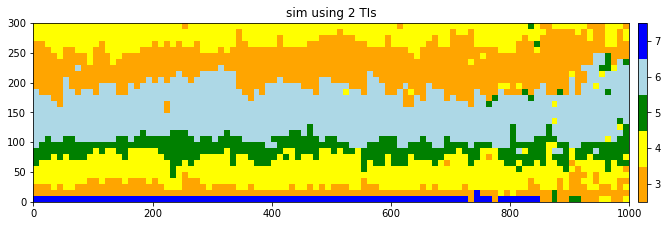

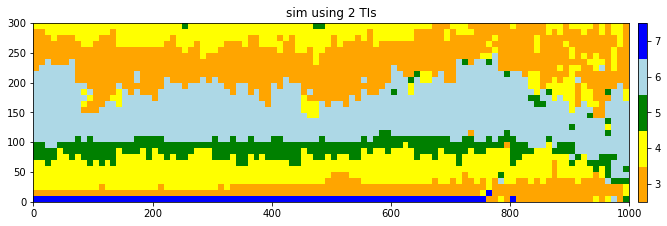

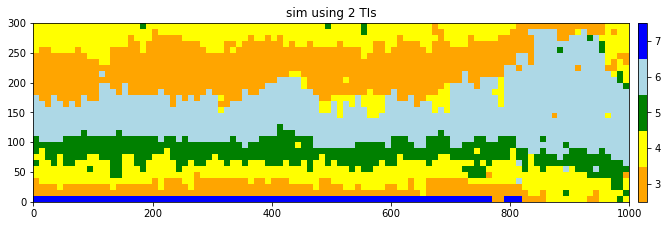

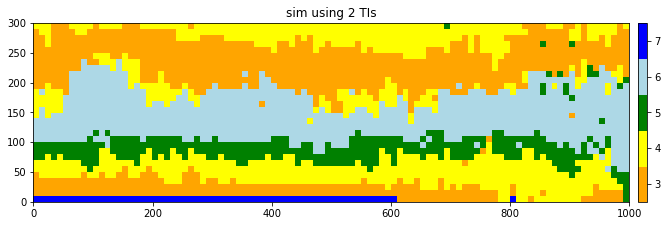

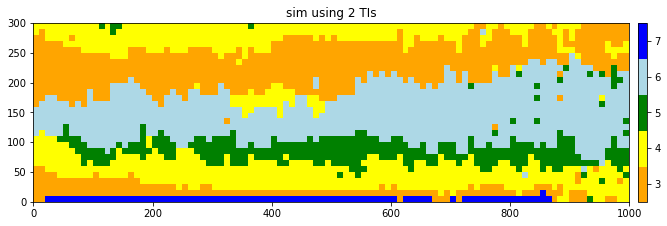

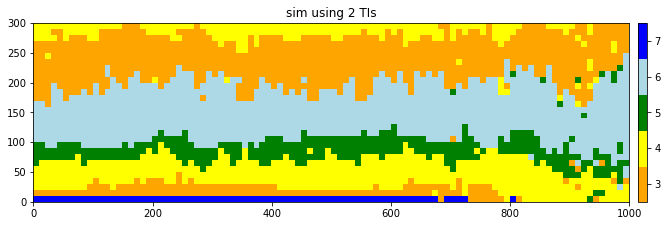

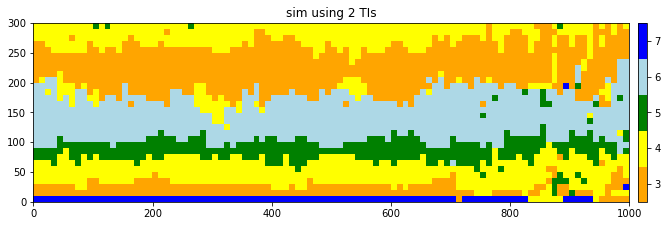

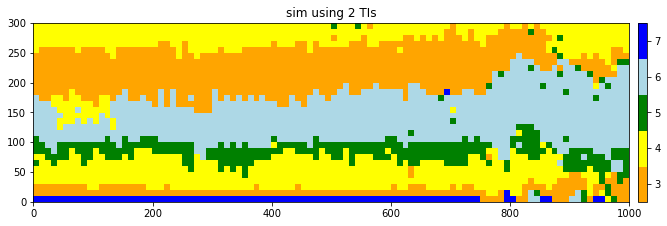

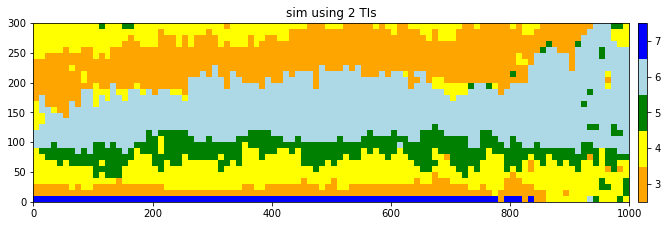

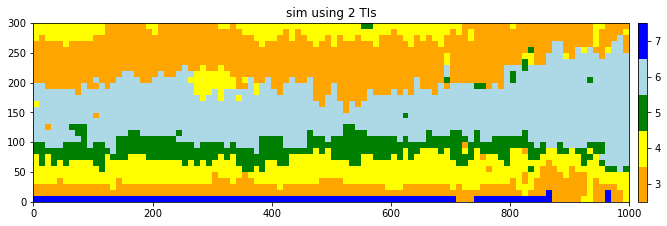

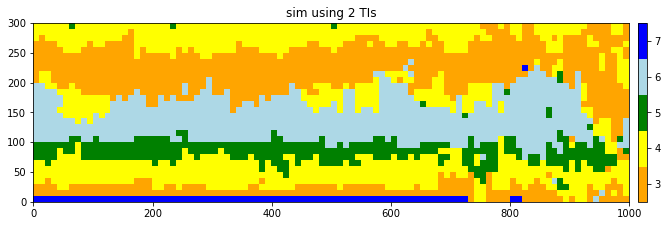

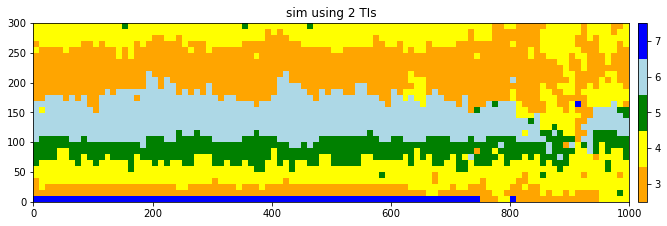

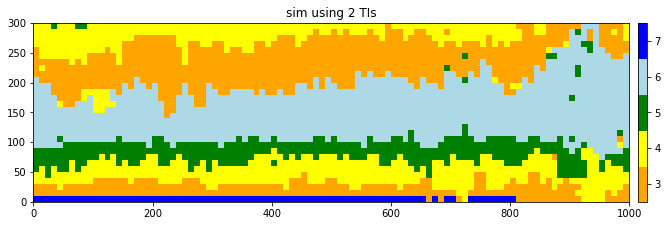

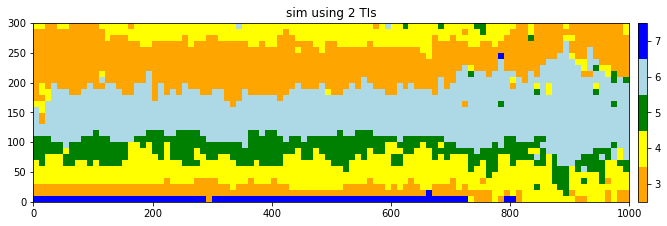

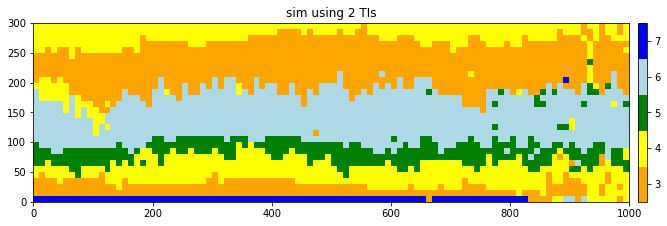

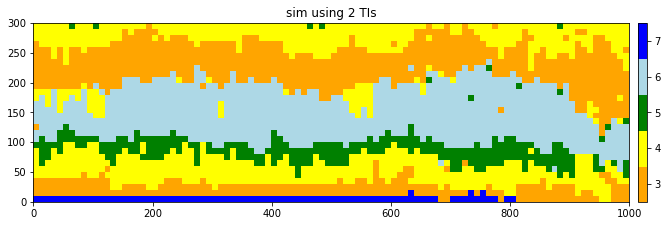

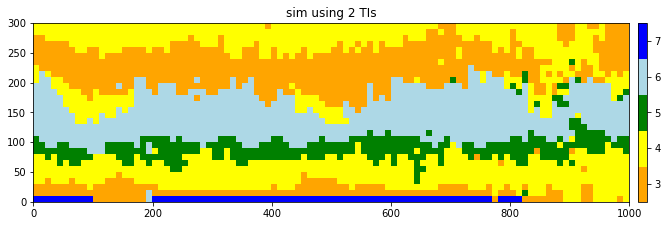

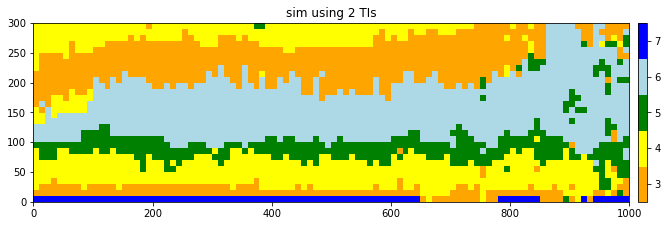

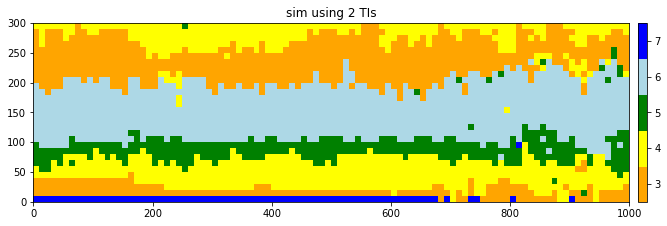

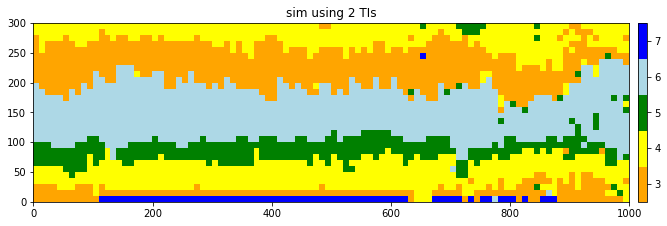

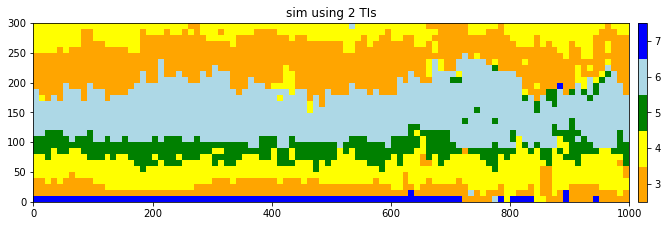

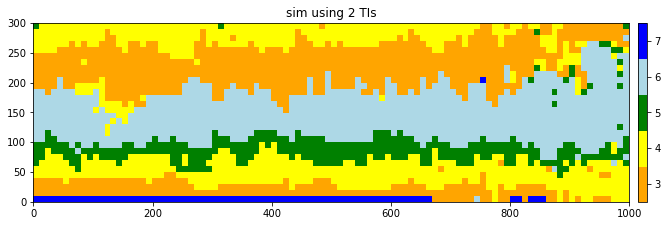

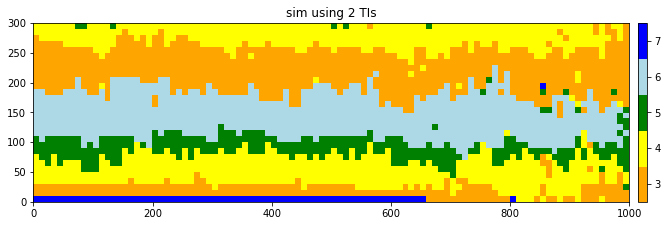

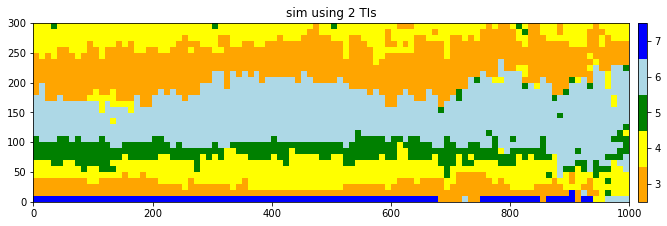

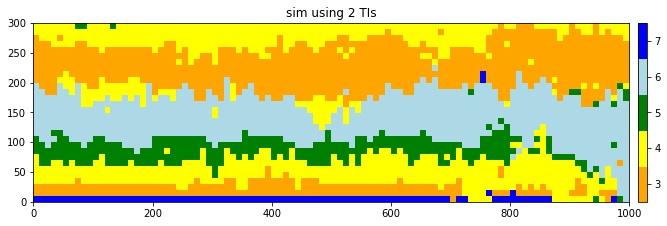

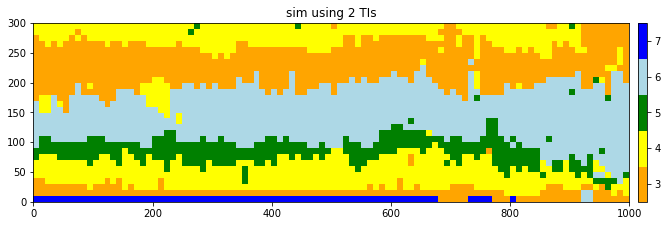

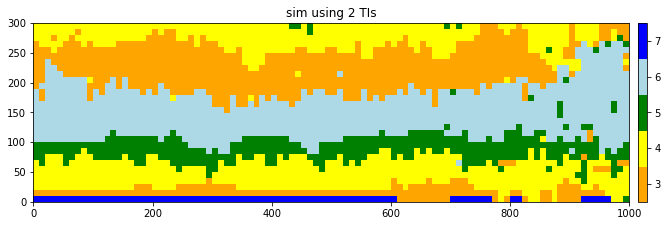

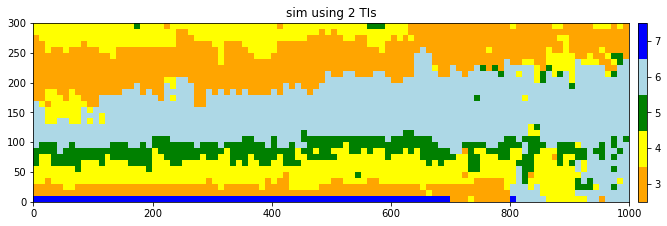

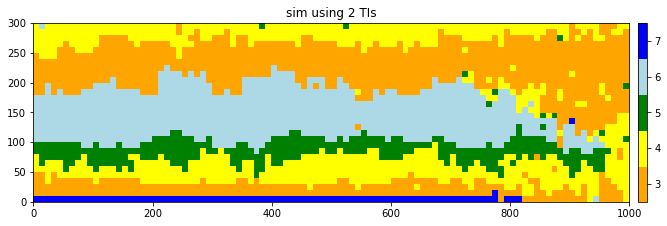

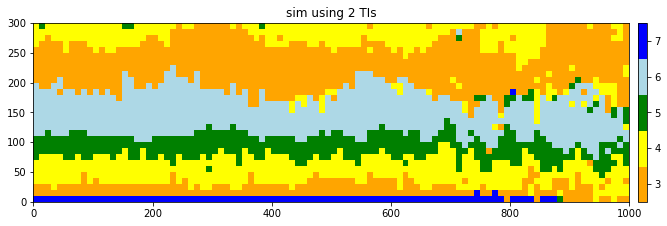

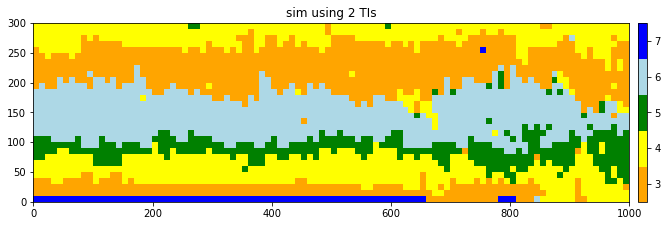

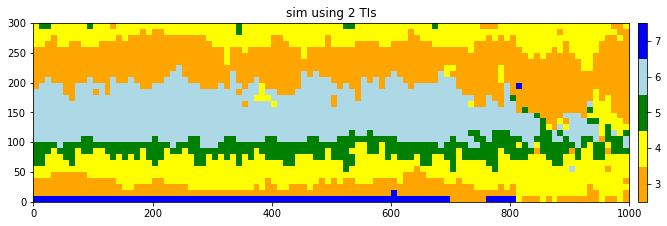

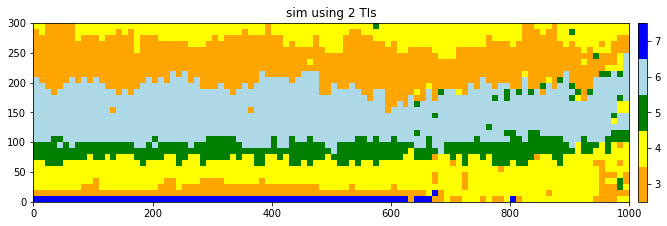

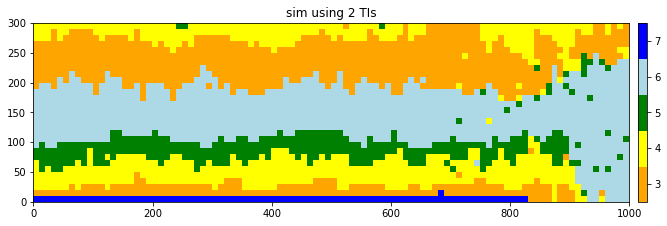

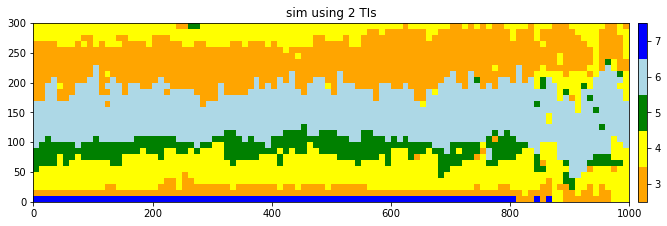

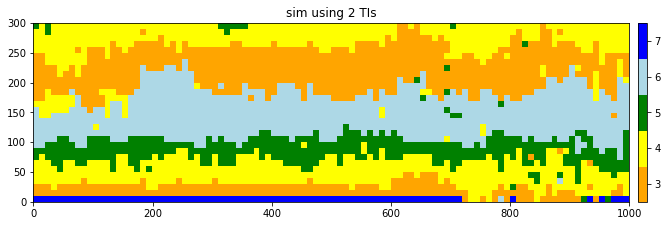

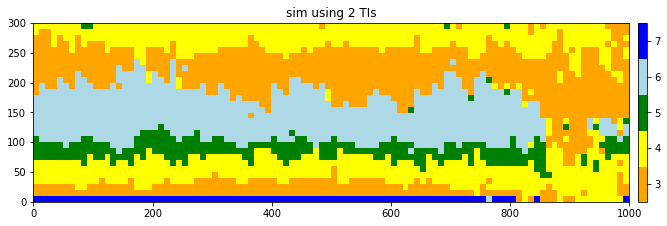

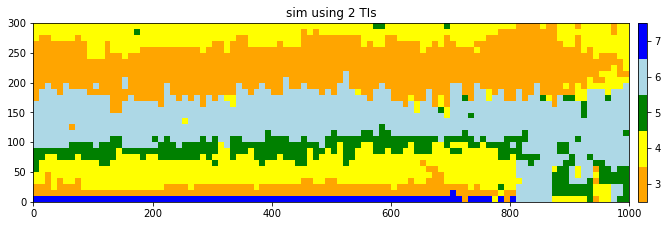

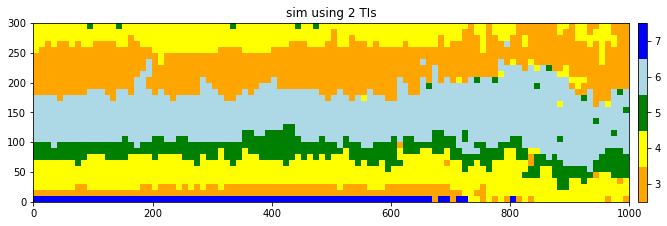

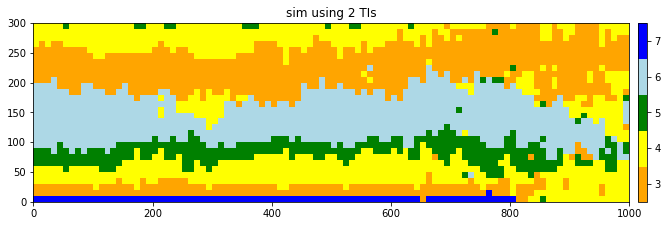

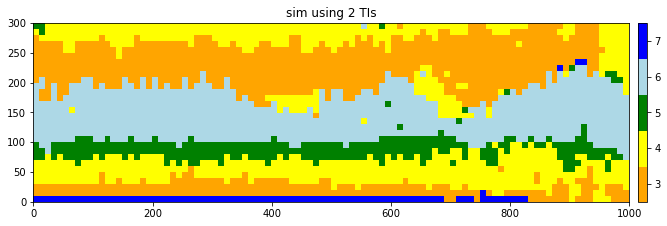

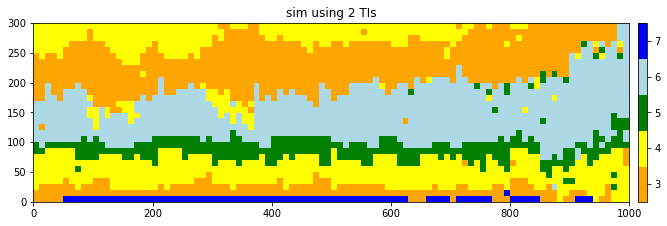

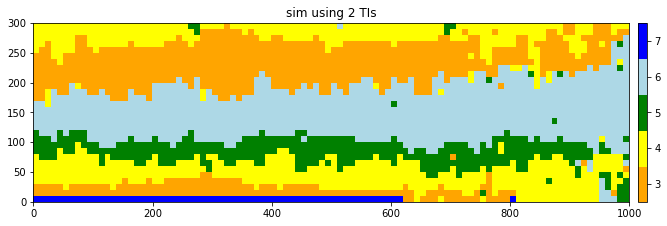

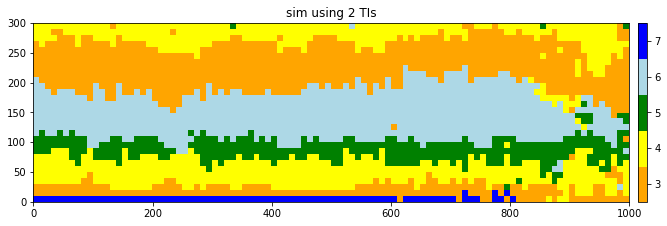

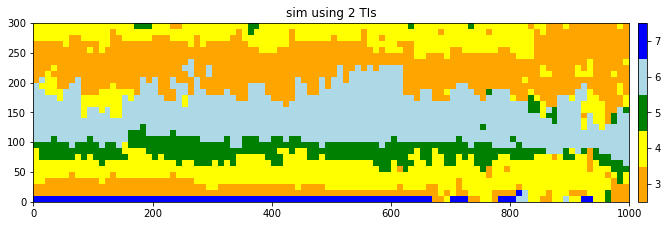

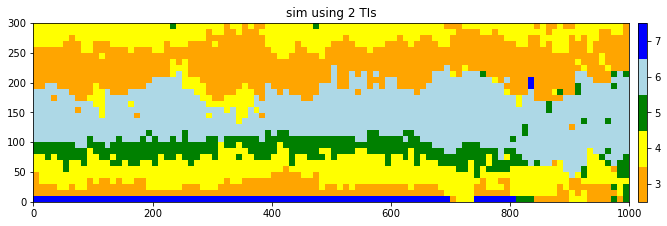

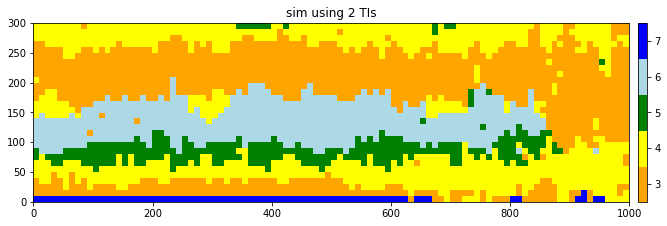

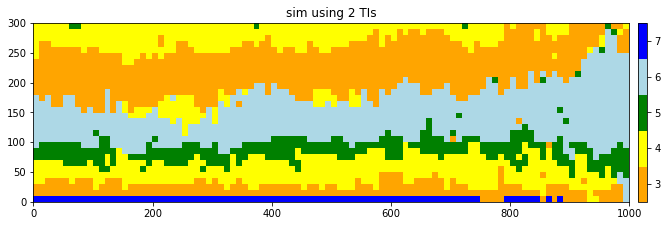

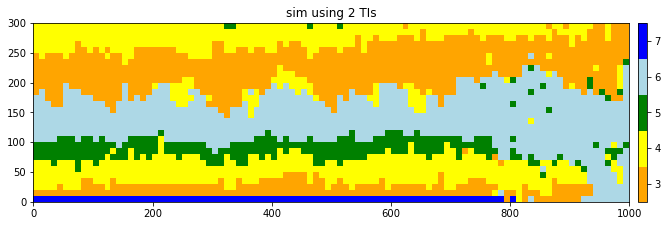

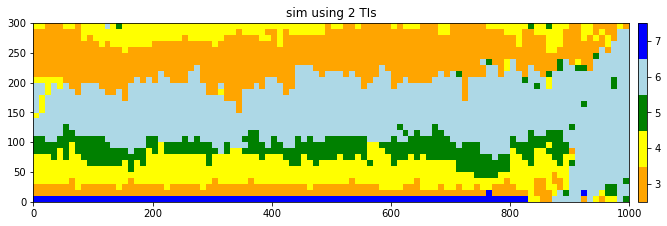

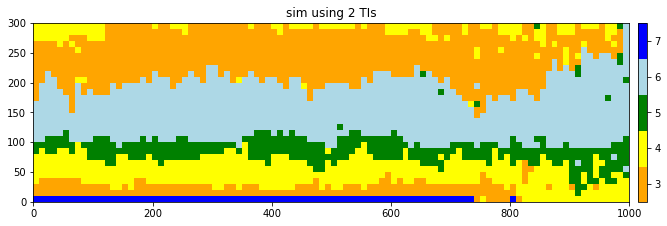

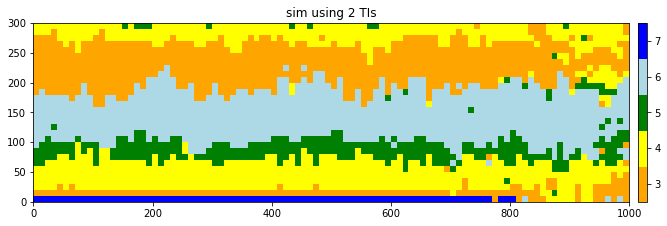

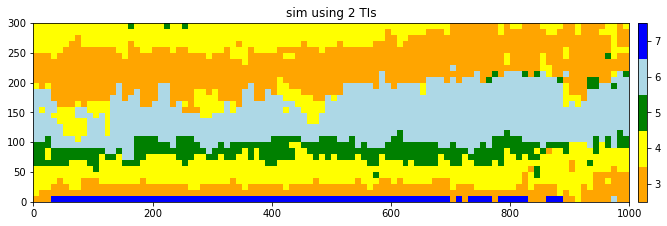

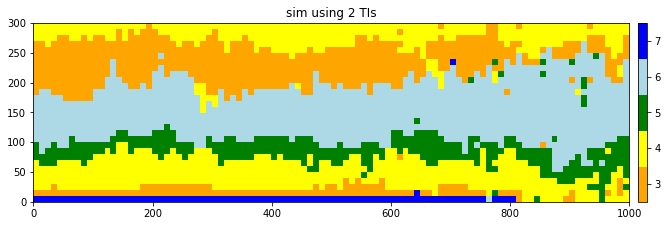

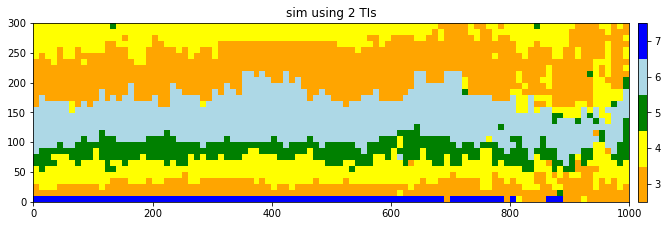

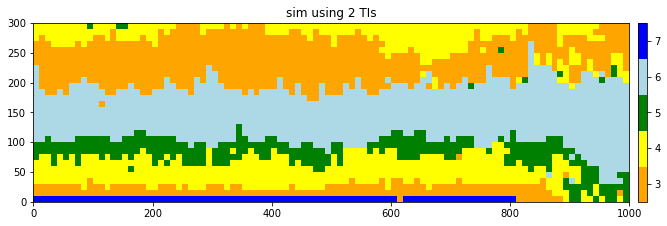

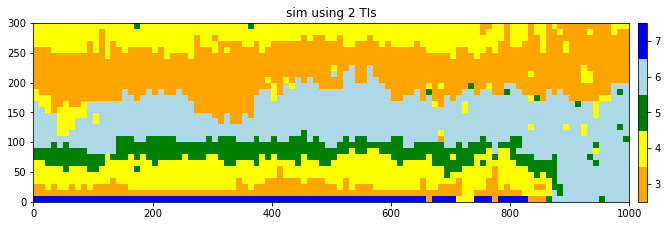

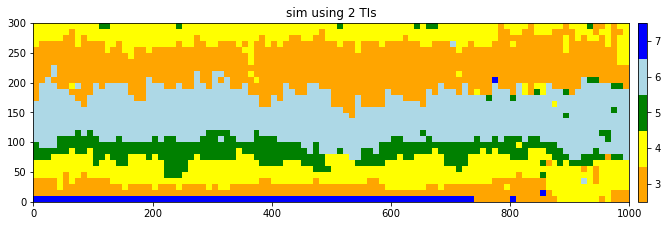

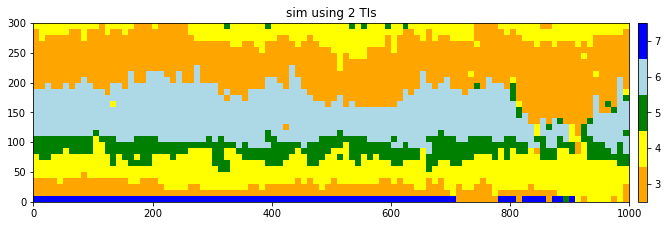

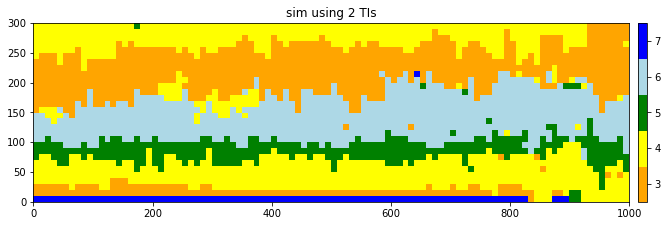

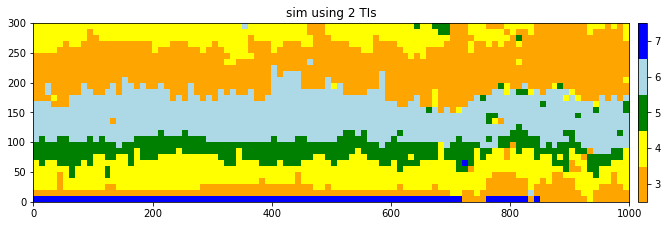

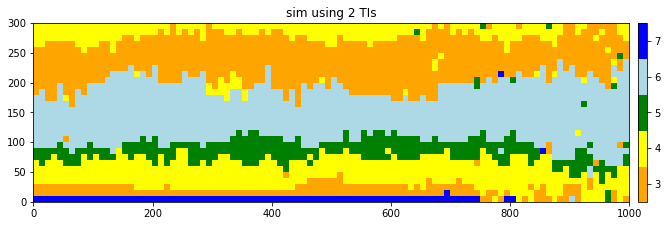

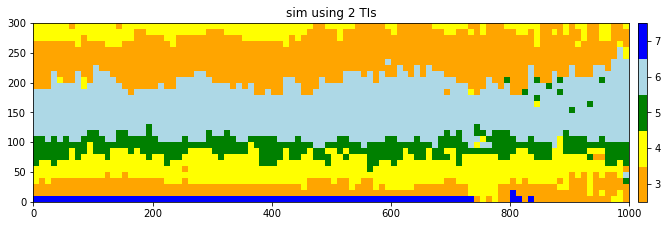

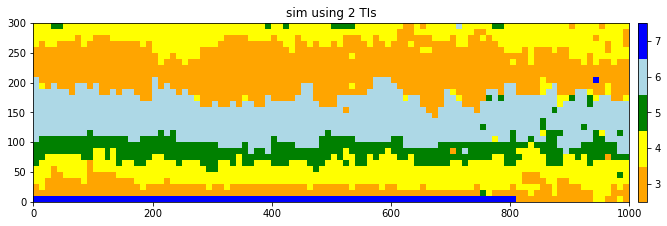

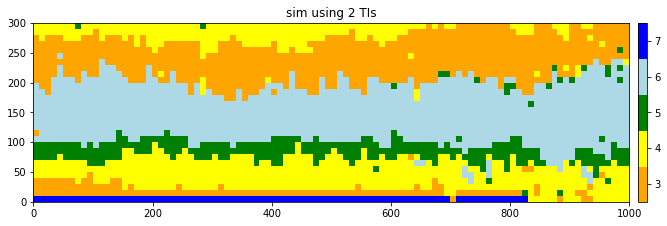

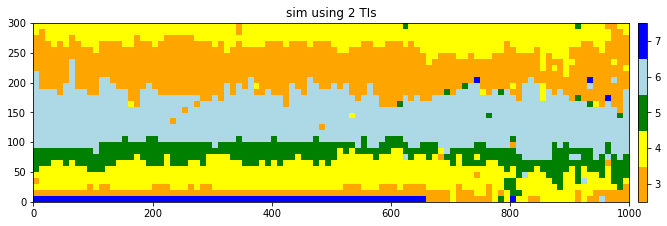

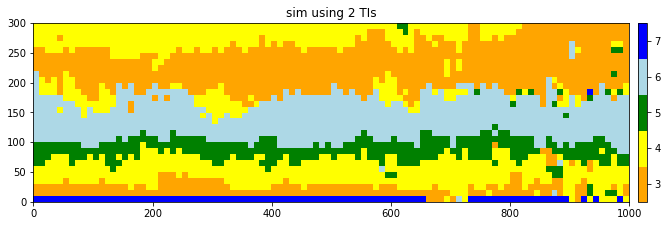

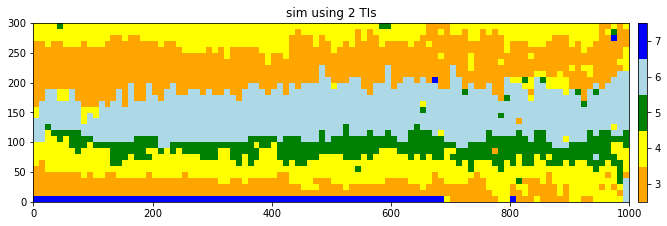

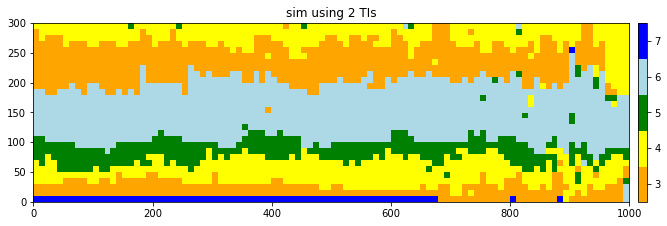

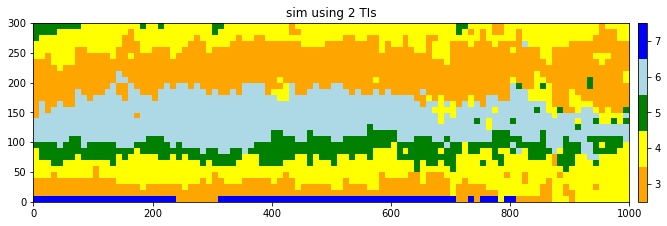

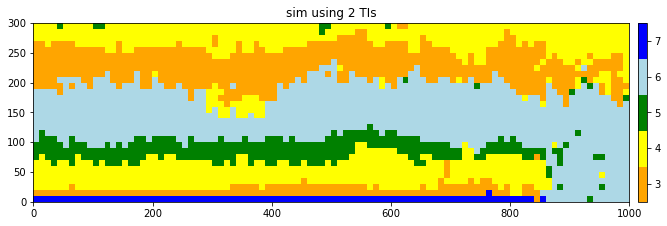

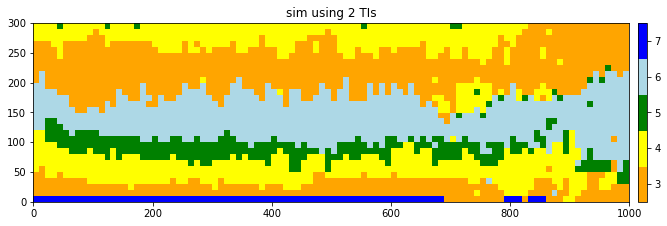

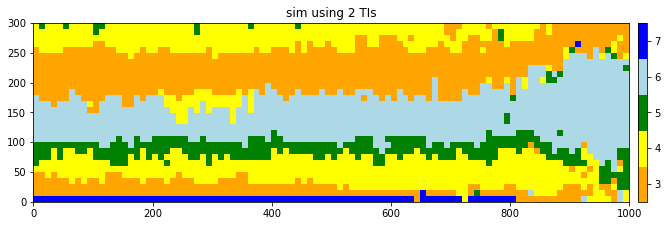

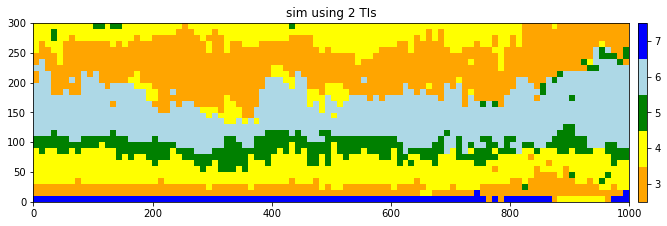

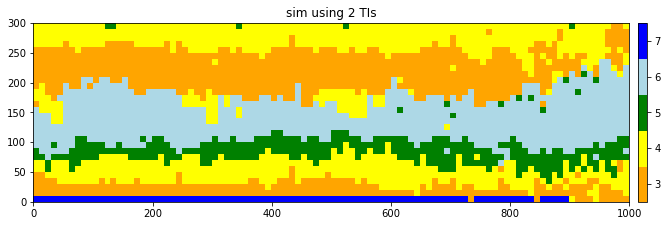

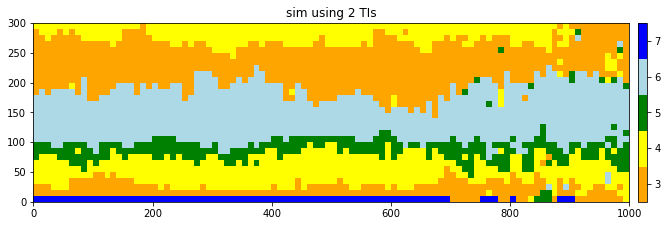

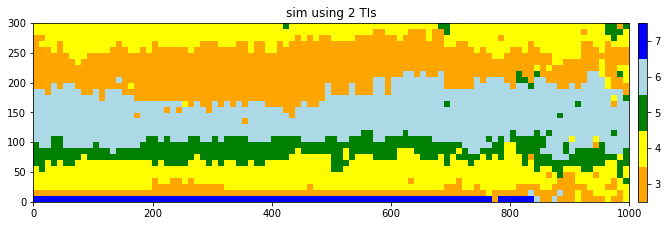

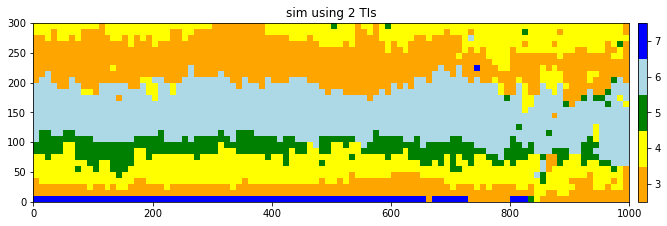

In [20]:
import os
sim=deesse_output['sim']
for i in range(100):
    plt.figure(figsize=(11,7))
    gn.imgplot.drawImage2D(sim[i], categ=True, categCol=col2,title='sim using 2 TIs')
    # plt.scatter(hd.x(),hd.y(),marker='o',s=100,
    #             color=hd_col, edgecolors='k', linewidths=1)
    plt.savefig("D:/相似度图/tt{}".format(i))
    # plt.show()